In [1]:
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.io as pio

# **IRIS Dataset**

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(iris.data)

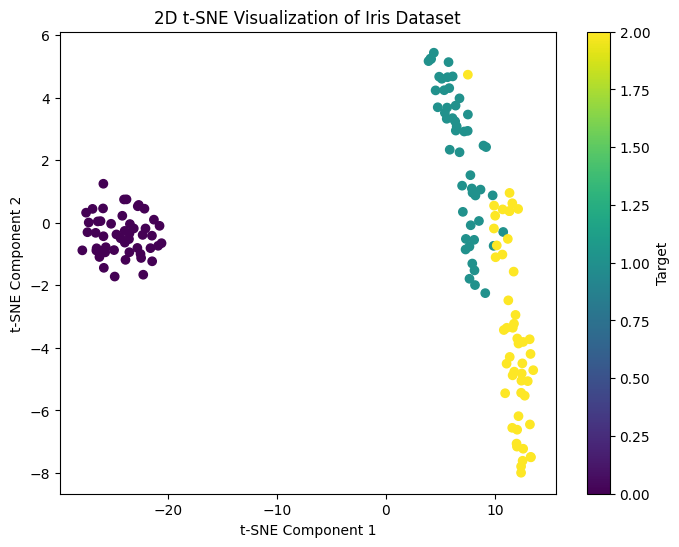

In [4]:
# Static 2D t-SNE plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='viridis')
plt.title('2D t-SNE Visualization of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Target')
plt.show()

In [5]:
# Interactive 2D t-SNE plot
fig_iris_2d = go.Figure(data=go.Scatter(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    mode='markers',
    marker=dict(
        size=5,
        color=iris.target,
        colorscale='Viridis',
        opacity=0.8
    )
))

fig_iris_2d.update_layout(
    title='Interactive 2D t-SNE Visualization of Iris Dataset',
    xaxis=dict(title='t-SNE Component 1'),
    yaxis=dict(title='t-SNE Component 2')
)

pio.show(fig_iris_2d)

In [6]:
# Perform t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(iris.data)

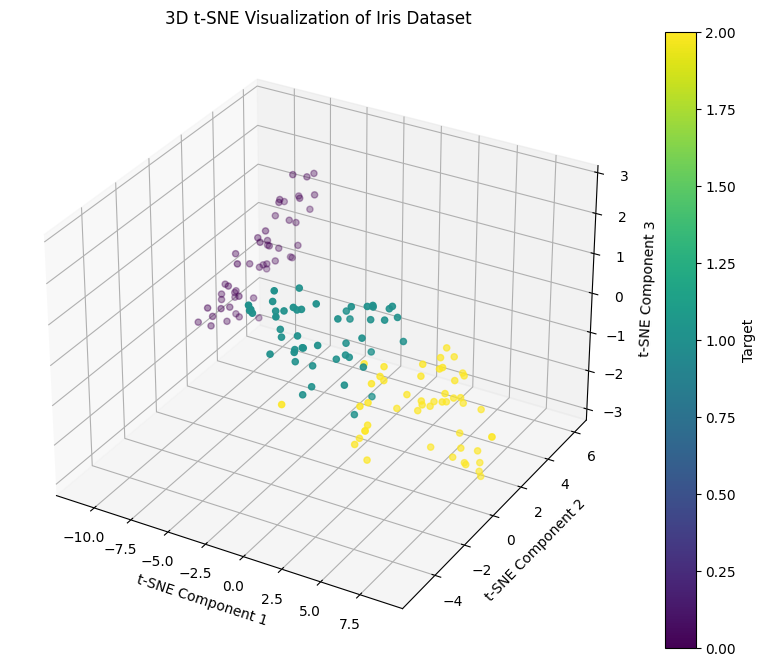

In [7]:
# Static 3D t-SNE plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=iris.target, cmap='viridis')
ax.set_title('3D t-SNE Visualization of Iris Dataset')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
fig.colorbar(scatter, label='Target')
plt.show()

In [8]:
# Interactive 3D t-SNE plot
fig_iris = go.Figure(data=[go.Scatter3d(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    z=X_tsne[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=iris.target,
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig_iris.update_layout(
    title='Interactive 3D t-SNE Visualization of Iris Dataset',
    scene=dict(
        xaxis=dict(title='t-SNE Component 1'),
        yaxis=dict(title='t-SNE Component 2'),
        zaxis=dict(title='t-SNE Component 3')
    )
)

pio.show(fig_iris)

# **WINE Dataset**

In [9]:
df=pd.read_csv('/content/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
# Perform 2D t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df.drop(['quality'], axis=1))

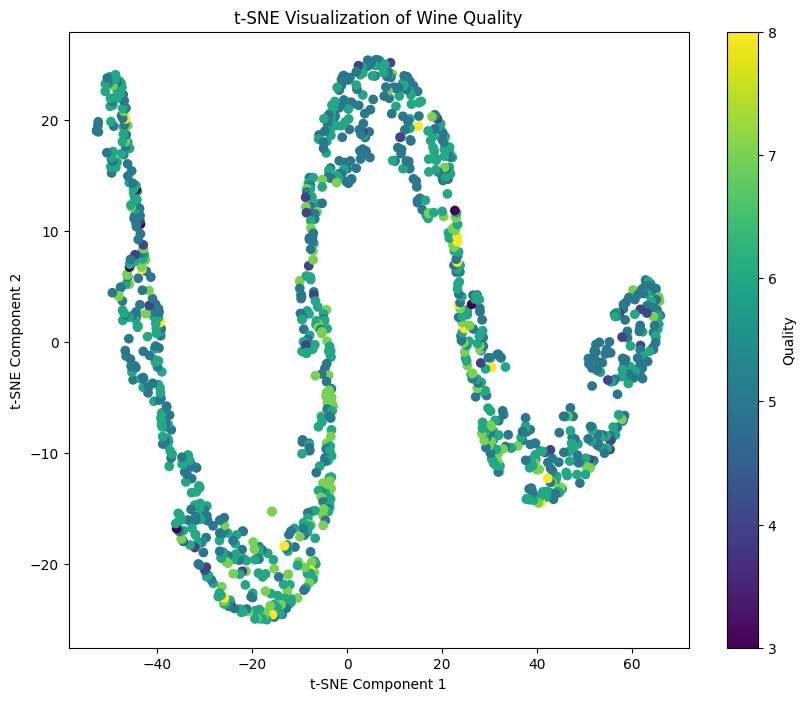

In [11]:
# Static 2D t-SNE plot
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['quality'], cmap='viridis')
plt.title('t-SNE Visualization of Wine Quality')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Quality')
plt.show()

In [12]:
# Interactive 2D t-SNE plot
fig = go.Figure(data=go.Scatter(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    mode='markers',
    marker=dict(
        size=8,
        color=df['quality'],
        colorscale='Viridis',
        opacity=0.8
    )
))

fig.update_layout(
    title='Interactive 2D t-SNE Visualization of Wine Quality',
    xaxis=dict(title='t-SNE Component 1'),
    yaxis=dict(title='t-SNE Component 2')
)

pio.show(fig)

In [13]:
# Perform 3D t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(df.drop(['quality'], axis=1))

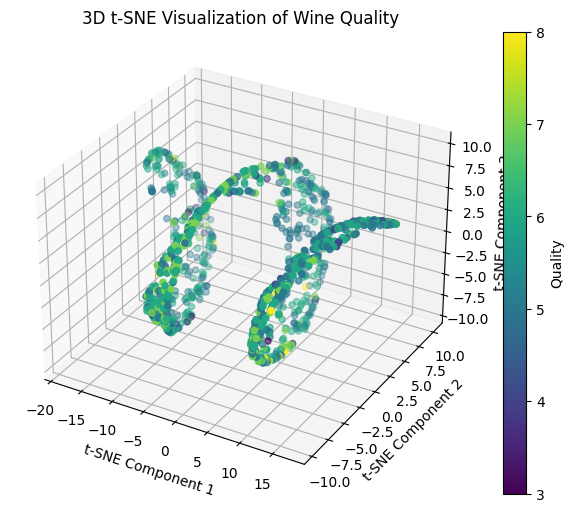

In [14]:
# Static 3D t-SNE plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=df['quality'], cmap='viridis')
ax.set_title('3D t-SNE Visualization of Wine Quality')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
fig.colorbar(scatter, label='Quality')
plt.show()

In [15]:
# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['tsne_component_1', 'tsne_component_2', 'tsne_component_3'])
tsne_df['quality'] = df['quality']

# Interactive 3D t-SNE plot
fig = go.Figure(data=[go.Scatter3d(
    x=tsne_df['tsne_component_1'],
    y=tsne_df['tsne_component_2'],
    z=tsne_df['tsne_component_3'],
    mode='markers',
    marker=dict(
        size=5,
        color=tsne_df['quality'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(
    title='Interactive 3D t-SNE Visualization of Wine Quality',
    scene=dict(
        xaxis=dict(title='t-SNE Component 1'),
        yaxis=dict(title='t-SNE Component 2'),
        zaxis=dict(title='t-SNE Component 3')
    )
)

fig.show()